In [488]:
# notebook for lab #2: NMR

# import libraries:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy as sp
from scipy.optimize import curve_fit
import random
from scipy.signal import argrelextrema


In [489]:
# load in some data:

lmo_t1_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 2/Code/lmo_T1_curve.csv'
lmo_t1 = np.loadtxt(lmo_t1_path, delimiter=',',skiprows=1).T

fig_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 2/Plots/'

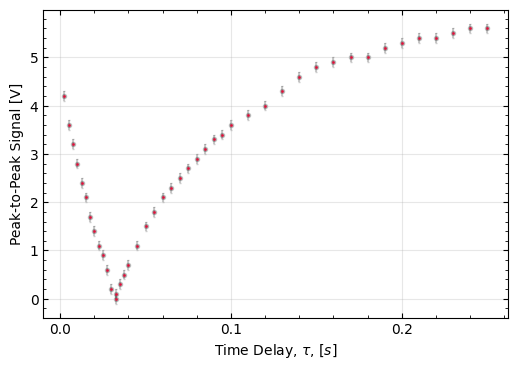

In [490]:

# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

ax1.scatter(lmo_t1[0], lmo_t1[1], edgecolor='crimson', c='white',s=1,zorder=5)
ax1.errorbar(lmo_t1[0], lmo_t1[1],yerr=2*lmo_t1[2],c='k', alpha=0.2, fmt='.', zorder=0,ecolor='black',capsize=1)


#ax1.legend()
ax1.set_xlabel(r"Time Delay, $\tau$, $[s]$")
ax1.set_ylabel(r"Peak-to-Peak Signal [V]" )
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
#ax1.set_ylim(-100,1500)
ax1.grid(True, alpha=0.3)



In [587]:
def exp_fit(x, a, b, c):
    return -a *(1-2*np.exp(-x / b)) + c
def chi_squared_reduced2(data, model, sigma, dof=None):

    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual / (sigma**2))
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        print(nu)
        return chi_sq / nu

p0 = (9,0.06,5.8) # start with values near those we expect
params, cv = sp.optimize.curve_fit(exp_fit, lmo_t1[0], lmo_t1[3], p0)
a,b,c = params
err_con = np.sqrt(np.diag(cv))

print(params, err_con)

t1_opt_mod = exp_fit(np.array(lmo_t1[0]), *params)

t1_chi = chi_squared_reduced2(np.array(lmo_t1[3]), t1_opt_mod, 2*np.array(lmo_t1[2]), dof=None)

t1_p = sp.stats.chi2.cdf(t1_chi, 40)

print(t1_chi, t1_p)

[-4.93088042  0.058799    0.62900581] [0.03475019 0.0011692  0.05253892]
74.82577709003608 0.9993049836621879


In [583]:
len(lmo_t1[2])

44

In [572]:
lmo_t1[0][13] / np.log(2)

0.047464666845246896

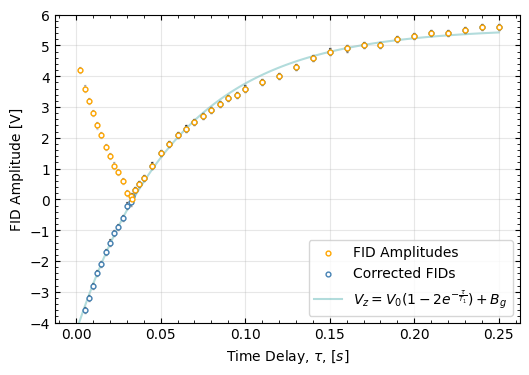

In [562]:

# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

ax1.scatter(lmo_t1[0], lmo_t1[1], edgecolor='#ffa600', c='white',s=12,zorder=10, label="FID Amplitudes")

ax1.scatter(lmo_t1[0], lmo_t1[3], edgecolor='steelblue', c='white',s=12,zorder=5, label="Corrected FIDs")
ax1.errorbar(lmo_t1[0], lmo_t1[3],yerr=2*lmo_t1[2],c='k', alpha=0.4, fmt='.', zorder=0,ecolor='black',capsize=1)

ax1.plot(np.linspace(0,0.25,100), exp_fit(np.linspace(0,0.25,100),*params), zorder=0, c='darkcyan', alpha=0.3, label=r"$V_z = V_0(1-2 e^{-\frac{\tau}{T_1}}) +B_g$")

ax1.errorbar(lmo_t1[0], lmo_t1[1],yerr=2*lmo_t1[2],c='k', alpha=0.2, fmt='.', zorder=0,ecolor='black',capsize=1)


ax1.legend()
ax1.set_xlabel(r"Time Delay, $\tau$, $[s]$")
ax1.set_ylabel(r"FID Amplitude [V]" )
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.01))
ax1.xaxis.set_major_locator(MultipleLocator(0.05))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_ylim(-4,6)
ax1.grid(True, alpha=0.3)

#plt.savefig(fig_path +'t1_spin_echo', dpi=800)


In [610]:
def monoExp(x, a, b, c):
    return a * np.exp(-2*x / b) + c


p02 = (9,0.06,5.8) # start with values near those we expect
params2, cv2 = sp.optimize.curve_fit(monoExp, lmo_t1[4][0:24], lmo_t1[5][0:24], p0)
a2,b2,c2 = params2
err_con2 = np.sqrt(np.diag(cv2))

print(params2, err_con2)

t2_opt_mod = monoExp(np.array(lmo_t1[5]), *params2)

t2_chi = chi_squared_reduced(np.array(lmo_t1[5])[0:24], t2_opt_mod[0:24], np.array(lmo_t1[6]), dof=None)

t2_p = 1 - sp.stats.chi2.cdf(t2_chi, 22)

print(t2_chi, t2_p)

[5.07521063 0.04430594 0.05996773] [0.03654557 0.00071873 0.01682938]
14.826220210587243 0.8695871676774212


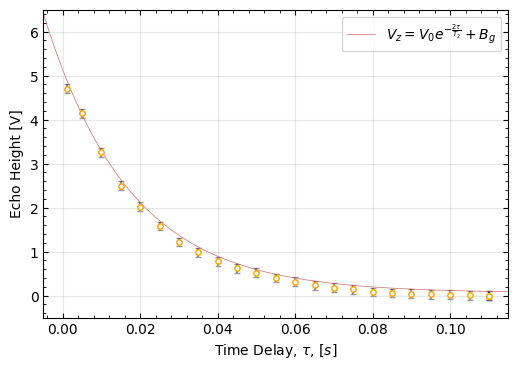

In [611]:
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

ax1.scatter(lmo_t1[4][0:24], lmo_t1[6][0:24], edgecolor='#ffa600', c='white',s=15,zorder=5)
ax1.errorbar(lmo_t1[4][0:24], lmo_t1[6][0:24],yerr=20*lmo_t1[7][0:24],c='k', alpha=0.4, fmt='.', zorder=0,ecolor='black',capsize=2)
ax1.plot(np.linspace(-0.01,0.12,100), monoExp(np.linspace(-0.01,0.12,100),*params2), zorder=0, c='indianred', alpha=0.9, linewidth=0.5,label=r"$V_z = V_0 e^{-\frac{2\tau}{T_2}} +B_g$")


ax1.legend()
ax1.set_xlabel(r"Time Delay, $\tau$, $[s]$")
ax1.set_ylabel(r"Echo Height [V]" )
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.004))
ax1.xaxis.set_major_locator(MultipleLocator(0.02))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-0.005,0.115)
ax1.set_ylim(-0.5,6.5)

ax1.grid(True, alpha=0.3)

#plt.savefig(fig_path +'t2_spin_echo', dpi=800)


In [147]:
# this is the beginning of the real figure making section. Need to figure out a way to load in the data:

# loads in a bunch of data:

file_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 2/Data/'

pp_volt = np.loadtxt(file_path+'rf_probe_peak_to_peak.csv', delimiter=',', usecols=(3,4)).T

opt_fid_on = np.loadtxt(file_path+'fid_after_opt_on_res_x4_nov_15.csv', delimiter=',', usecols=(3,4,9,10)).T

fid_on = np.loadtxt(file_path+'fid_on_resonance_nov_15.csv', delimiter=',', usecols=(3,4,9,10)).T

# next on vs off resonance:

fid_on2 = np.loadtxt(file_path+'fid_on_resonance_nov_20.csv', delimiter=',', usecols=(3,4,9,10)).T

fid_off = np.loadtxt(file_path+'fid_off_resonance_nov_20.csv', delimiter=',', usecols=(3,4,9,10)).T

# finally we need the cp and mg sequences:

cp_1 = np.loadtxt(file_path+'carl_purcell_N30_tau0.0040.csv', delimiter=',', usecols=(3,4)).T
cp_2 = np.loadtxt(file_path+'carl_purcell_N30_tau0.0040_2.csv', delimiter=',', usecols=(3,4)).T
cp_3 = np.loadtxt(file_path+'carl_purcell_N30_tau0.0040_3.csv', delimiter=',', usecols=(3,4)).T
cp_4 = np.loadtxt(file_path+'carl_purcell_N30_tau0.0040_4.csv', delimiter=',', usecols=(3,4)).T
cp_5 = np.loadtxt(file_path+'carl_purcell_N30_tau0.0040_5.csv', delimiter=',', usecols=(3,4)).T

mg_1 = np.loadtxt(file_path+'MG_30_tau0.0040_decent.csv', delimiter=',', usecols=(3,4)).T
mg_2 = np.loadtxt(file_path+'MG_30_tau0.0040_decent_2.csv', delimiter=',', usecols=(3,4)).T
mg_3 = np.loadtxt(file_path+'MG_30_tau0.0040_decent_3.csv', delimiter=',', usecols=(3,4)).T
mg_4 = np.loadtxt(file_path+'MG_30_tau0.0040_decent_4.csv', delimiter=',', usecols=(3,4)).T
mg_5 = np.loadtxt(file_path+'MG_30_tau0.0040_good_5.csv', delimiter=',', usecols=(3,4)).T



In [267]:
from scipy.signal import argrelmax
from scipy.signal import find_peaks

h= 0.2; d = 50; idx =26

mg_1_env = np.array([mg_1[0][find_peaks(mg_1[1], height=h,distance=d)[0]][0:idx], mg_1[1][find_peaks(mg_1[1], height=h,distance=d)[0]][0:idx]])
mg_2_env = np.array([mg_2[0][find_peaks(mg_2[1], height=h,distance=d)[0]][0:idx], mg_2[1][find_peaks(mg_2[1], height=h,distance=d)[0]][0:idx]])
mg_3_env = np.array([mg_3[0][find_peaks(mg_3[1], height=h,distance=d)[0]][0:idx], mg_3[1][find_peaks(mg_3[1], height=h,distance=d)[0]][0:idx]])
mg_4_env = np.array([mg_4[0][find_peaks(mg_4[1], height=h,distance=d)[0]][0:idx], mg_4[1][find_peaks(mg_4[1], height=h,distance=d)[0]][0:idx]])
mg_5_env = np.array([mg_5[0][find_peaks(mg_5[1], height=h,distance=d)[0]][0:idx], mg_5[1][find_peaks(mg_5[1], height=h,distance=d)[0]][0:idx]])


mg_env_x = np.array([mg_1_env[0], mg_2_env[0], mg_3_env[0], mg_4_env[0], mg_5_env[0]]).T
mg_env_y = np.array([mg_1_env[1], mg_2_env[1], mg_3_env[1], mg_4_env[1], mg_5_env[1]]).T

mg_env_x_avg = [np.mean(mg_env_x[i]) for i in range(len(mg_env_y))]
mg_env_y_avg = [np.mean(mg_env_y[i]) for i in range(len(mg_env_y))]

mg_env_x_std = [np.std(mg_env_x[i]) for i in range(len(mg_env_y))]
mg_env_y_std = [np.std(mg_env_y[i]) for i in range(len(mg_env_y))]


In [279]:
h= 0.2; d = 50; idx =27

cp_1_env = np.array([cp_1[0][find_peaks(cp_1[1], height=h,distance=d)[0]][0:idx], cp_1[1][find_peaks(cp_1[1], height=h,distance=d)[0]][0:idx]])
cp_2_env = np.array([cp_2[0][find_peaks(cp_2[1], height=h,distance=d)[0]][0:idx], cp_2[1][find_peaks(cp_2[1], height=h,distance=d)[0]][0:idx]])
cp_3_env = np.array([cp_3[0][find_peaks(cp_3[1], height=h,distance=d)[0]][0:idx], cp_3[1][find_peaks(cp_3[1], height=h,distance=d)[0]][0:idx]])
cp_4_env = np.array([cp_4[0][find_peaks(cp_4[1], height=h,distance=d)[0]][0:idx], cp_4[1][find_peaks(cp_4[1], height=h,distance=d)[0]][0:idx]])
cp_5_env = np.array([cp_5[0][find_peaks(cp_5[1], height=h,distance=d)[0]][0:idx], cp_5[1][find_peaks(cp_5[1], height=h,distance=d)[0]][0:idx]])


cp_env_x = np.array([cp_1_env[0], cp_2_env[0], cp_3_env[0], cp_4_env[0], cp_5_env[0]]).T
cp_env_y = np.array([cp_1_env[1], cp_2_env[1], cp_3_env[1], cp_4_env[1], cp_5_env[1]]).T

cp_env_x_avg = [np.mean(cp_env_x[i]) for i in range(len(cp_env_y))]
cp_env_y_avg = [np.mean(cp_env_y[i]) for i in range(len(cp_env_y))]

cp_env_x_std = [np.std(cp_env_x[i]) for i in range(len(cp_env_y))]
cp_env_y_std = [np.std(cp_env_y[i]) for i in range(len(cp_env_y))]

In [371]:
def chi_squared_reduced(data, model, sigma, dof=None):

    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual / (sigma**2))
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        print(nu)
        return chi_sq / nu

In [541]:


def monoExp2(x, a, b, c):
    return a * np.exp(-x / b) + c


cp_p0 = (9,0.06,5.8) # start with values near those we expect
cp_params, cp_cv = sp.optimize.curve_fit(monoExp2, cp_env_x_avg, cp_env_y_avg, p0=p0, sigma=np.array(cp_env_y_std), absolute_sigma=True)
cpa,cpb,cpc = cp_params
err_cp = np.sqrt(np.diag(cp_cv))
print(cp_params, err_cp)

mg_p0 = (9,0.06,5.8) # start with values near those we expect
mg_params, mg_cv = sp.optimize.curve_fit(monoExp2, mg_env_x_avg, mg_env_y_avg, p0=p0, sigma=np.array(mg_env_y_std), absolute_sigma=True)
mga,mgb,mgc = mg_params
err_mg = np.sqrt(np.diag(mg_cv))
print(mg_params, err_mg)

cp_opt_mod = monoExp2(np.array(cp_env_y_avg), *cp_params)
mg_opt_mod = monoExp2(np.array(mg_env_y_avg), *mg_params)


cp_chi = chi_squared_reduced(np.array(cp_env_y_avg), cp_opt_mod, np.array(cp_env_y_std), dof=None)
mg_chi = chi_squared_reduced(np.array(mg_env_y_avg), mg_opt_mod, np.array(mg_env_y_std), dof=None)

cp_p = 1 - sp.stats.chi2.cdf(cp_chi, 24)
mg_p = 1 - sp.stats.chi2.cdf(mg_chi, 23)

print(cp_chi, cp_p)
print(mg_chi, mg_p)

[5.29453904 0.03904961 0.45543933] [0.03204814 0.00113857 0.02175808]
[5.30203522 0.0394595  0.37943749] [0.02382318 0.00083111 0.01803466]
8.679979121786022 0.9982035963184434
9.514287859243776 0.993901495312255


In [387]:
1 - sp.stats.chi2.cdf(9.514, 23)


0.9939028403090509

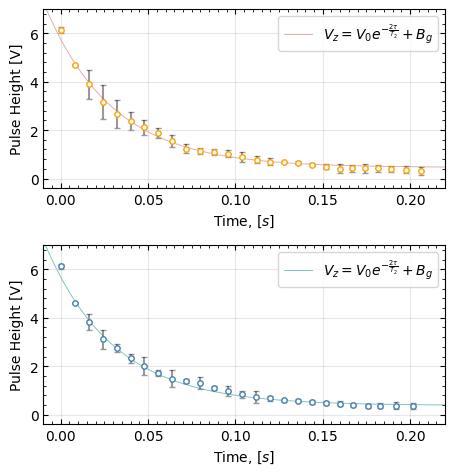

In [578]:
# plots the data:
ff, (ax1,ax2) = plt.subplots(2, 1)
ff.set_figwidth(5)
ff.set_figheight(5)
ff.tight_layout(pad=2)

ax1.scatter(cp_env_x_avg, cp_env_y_avg, edgecolor='#ffa600', c='white',s=15,zorder=5)
ax1.errorbar(cp_env_x_avg, cp_env_y_avg,yerr=2*np.array(cp_env_y_std),c='k', alpha=0.4, fmt='.', zorder=0,ecolor='black',capsize=2)

ax2.scatter(mg_env_x_avg, mg_env_y_avg, edgecolor='steelblue', c='white',s=15,zorder=5)
ax2.errorbar(mg_env_x_avg, mg_env_y_avg,yerr=2*np.array(mg_env_y_std),c='k', alpha=0.4, fmt='.', zorder=0,ecolor='black',capsize=2)


xxx = np.linspace(-0.1, 1, 1000)
ax1.plot(xxx,monoExp2(np.array(xxx),*cp_params),'-',linewidth=0.7, c='INDIANRED', alpha=0.5, zorder=0,label=r"$V_z = V_0 e^{-\frac{2\tau}{T_2}} +B_g$")
ax2.plot(xxx,monoExp2(np.array(xxx),*mg_params),'-',linewidth=0.7, c='darkcyan', alpha=0.5, zorder=0,label=r"$V_z = V_0 e^{-\frac{2\tau}{T_2}} +B_g$")



ax1.legend()
ax1.set_xlabel(r"Time, $[s]$")
ax1.set_ylabel(r"Pulse Height [V]" )
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.set_minor_locator(MultipleLocator(0.005))
ax1.xaxis.set_major_locator(MultipleLocator(0.05))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_ylim(-0.4, 7)
ax1.set_xlim(-0.01, 0.22)


#ax1.set_ylim(-100,1500)
ax1.grid(True, alpha=0.3)
ax2.legend()

ax2.set_xlabel(r"Time, $[s]$")
ax2.set_ylabel(r"Pulse Height [V]" )
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.4))
ax2.xaxis.set_minor_locator(MultipleLocator(0.005))
ax2.xaxis.set_major_locator(MultipleLocator(0.05))
ax2.tick_params(axis='both', direction="in")
ax2.tick_params(which="minor", axis="x", direction="in")
ax2.tick_params(which="minor", axis="y", direction="in")
ax2.xaxis.set_ticks_position('both') 
ax2.yaxis.set_ticks_position('both')
ax2.set_ylim(-0.4, 7)
ax2.set_xlim(-0.01, 0.22)
ax2.grid(True, alpha=0.3)

#plt.savefig(fig_path +'sequence_decays', dpi=800)


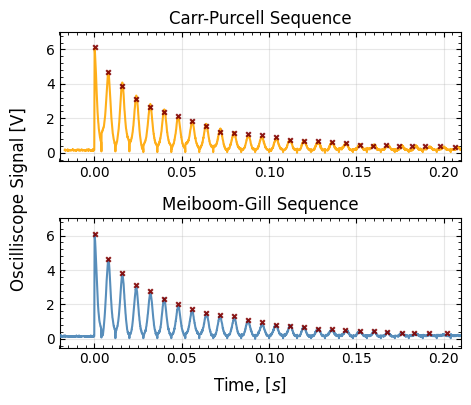

In [579]:
# plots the data:
ff, (ax1,ax2) = plt.subplots(2,1)
ff.set_figwidth(5)
ff.set_figheight(4)
ff.tight_layout(pad=2)



ax1.plot(cp_1[0], cp_1[1], c='#ffa600',alpha=0.9, label=r"FID", zorder=10)

ax2.plot(mg_5[0], mg_5[1], c='steelblue',alpha=0.9, zorder=10)

ax1.scatter(cp_env_x_avg, cp_env_y_avg, c='maroon',alpha=0.9, marker='x', s=11, zorder=15)
ax2.scatter(mg_env_x_avg, mg_env_y_avg, c='maroon',alpha=0.9, marker='x', s=11, zorder=15, label='Mean Height of $N_i$')


#ax1.legend(loc=4)
ff.supxlabel(r"Time, $[s]$")
ff.supylabel(r"Oscilliscope Signal [V]" )
ax1.set_title("Carr-Purcell Sequence")
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.set_minor_locator(MultipleLocator(0.005))
ax1.xaxis.set_major_locator(MultipleLocator(0.05))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-0.02,0.21)
ax1.set_ylim(-0.5,7)
ax1.grid(True, alpha=0.3)

#ax2.legend(loc=1)

ax2.set_title("Meiboom-Gill Sequence")
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.4))
ax2.xaxis.set_minor_locator(MultipleLocator(0.005))
ax2.xaxis.set_major_locator(MultipleLocator(0.05))
ax2.tick_params(axis='both', direction="in")
ax2.tick_params(which="minor", axis="x", direction="in")
ax2.tick_params(which="minor", axis="y", direction="in")
ax2.xaxis.set_ticks_position('both') 
ax2.yaxis.set_ticks_position('both')
ax2.set_xlim(-0.02,0.21)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5,7)

#plt.show()

#plt.savefig(fig_path +'sequence_plots', dpi=800)


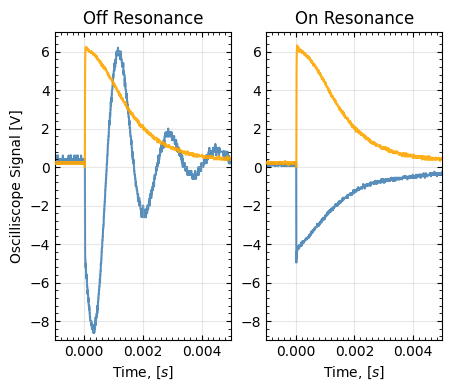

In [419]:
# plots the data:
ff, (ax1,ax2) = plt.subplots(1, 2)
ff.set_figwidth(5)
ff.set_figheight(4)


ax2.plot(fid_on2[0],fid_on2[1], c='#ffa600',alpha=0.9, label=r"FID", zorder=10)
ax2.plot(fid_on2[2],fid_on2[3], c='steelblue',alpha=0.9, label=r"On Resonance")

ax1.plot(list(fid_off[0]),list(fid_off[1]), c='#ffa600',alpha=0.9, label=r"FID", zorder=10)
ax1.plot(fid_off[2],fid_off[3], c='steelblue',alpha=0.9, label=r"Off Resonance", zorder=0)

#ax1.legend(loc=4)
ax1.set_xlabel(r"Time, $[s]$")
ax1.set_ylabel(r"Oscilliscope Signal [V]" )
ax1.set_title("Off Resonance")
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.set_minor_locator(MultipleLocator(0.0002))
ax1.xaxis.set_major_locator(MultipleLocator(0.002))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-0.001,0.005)
ax1.set_ylim(-9, 7)
ax1.grid(True, alpha=0.3)

#ax2.legend(loc=4)
ax2.set_xlabel(r"Time, $[s]$")
ax2.set_title("On Resonance")

#ax2.set_ylabel(r"Oscilliscope Signal [V]" )
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.4))
ax2.xaxis.set_minor_locator(MultipleLocator(0.0002))
ax2.xaxis.set_major_locator(MultipleLocator(0.002))
ax2.tick_params(axis='both', direction="in")
ax2.tick_params(which="minor", axis="x", direction="in")
ax2.tick_params(which="minor", axis="y", direction="in")
ax2.xaxis.set_ticks_position('both') 
ax2.yaxis.set_ticks_position('both')
ax2.set_xlim(-0.001,0.005)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-9, 7)

#plt.savefig(fig_path +'on_off_resonance', dpi=600)


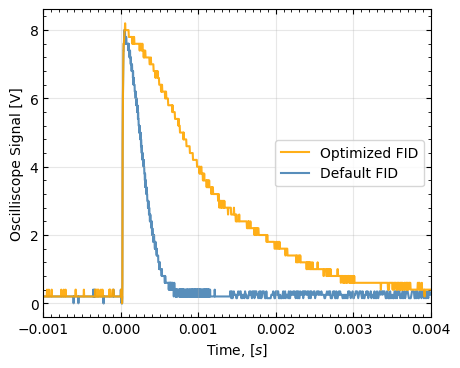

In [420]:
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(5)
ff.set_figheight(4)

add_to_x = list(np.linspace(0.00141, 0.00543599948, 500))
add_to_y = [0.1 * random.randint(0,2)+0.15 for i in range(len(add_to_x))]

ax1.plot(opt_fid_on[0],opt_fid_on[1], c='#ffa600',alpha=0.9, label=r"Optimized FID")
#ax1.plot(opt_fid_on[2],opt_fid_on[3]-1, c='cornflowerblue',alpha=0.9, label=r"$")

ax1.plot(list(fid_on[0])+add_to_x,list(fid_on[1])+add_to_y, c='steelblue',alpha=0.9, label=r"Default FID", zorder=0)
#ax1.plot(fid_on[2],fid_on[3]-1, c='cornflowerblue',alpha=0.9, label=r"$")

ax1.legend(loc=7)
ax1.set_xlabel(r"Time, $[s]$")
ax1.set_ylabel(r"Oscilliscope Signal [V]" )
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.set_minor_locator(MultipleLocator(0.0001))
ax1.xaxis.set_major_locator(MultipleLocator(0.001))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-0.001,0.004)
ax1.grid(True, alpha=0.3)

plt.savefig(fig_path +'opt_vs_noopt', dpi=600)


2500

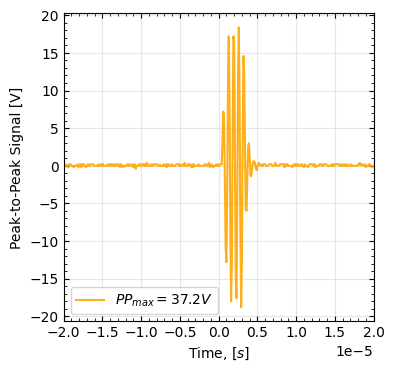

In [421]:
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(4)
ff.set_figheight(4)

ax1.plot(pp_volt[0]-0.0000006, pp_volt[1], c='#ffa600',alpha=0.9, label=r"$PP_{max} = 37.2 V$")

ax1.legend(loc=3)
ax1.set_xlabel(r"Time, $[s]$")
ax1.set_ylabel(r"Peak-to-Peak Signal [V]" )
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.000001))
ax1.xaxis.set_major_locator(MultipleLocator(0.000005))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-0.00002,0.00002)
ax1.grid(True, alpha=0.3)


plt.savefig(fig_path +'peak_2_peak', dpi=600)


In [208]:
max(pp_volt[1]) -min(pp_volt[1])

37.200000700000004

In [196]:
min(pp_volt[1])

-18.8000011